In [ ]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

train_n = 1024
X_train = X_train[:train_n,:,:]
X_test = X_test[:train_n,:,:]
y_train = y_train[:train_n]
y_test = y_test[:train_n]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

X_train = np.transpose(X_train.reshape(X_train.shape[0], 784)/255)
print(X_train.shape)
X_test = np.transpose(X_test.reshape(X_test.shape[0], 784)/255)

11493376/11490434 [==============================] - 0s 0us/step
(1024, 28, 28)
(1024, 28, 28)
(1024,)
(784, 1024)


In [ ]:
# 0-9 Conversion to ASCII #
dict = {0: 48, 1: 49, 2: 50, 3: 51, 4: 52, 5: 53, 6: 54, 7: 55, 8: 56, 9: 57}

y_train_ascii = np.array([dict[i] for i in y_train], dtype=np.uint8)
y_test_ascii = np.array([dict[i] for i in y_test], dtype=np.uint8)

y_train_ascii_bin = np.zeros((1024,8))
y_test_ascii_bin = np.zeros((1024,8))

count=0
for y in y_train_ascii:
  y_train_ascii_bin[count] = np.unpackbits(y)
  count+=1

count=0
for z in y_test_ascii:
  y_test_ascii_bin[count] = np.unpackbits(z)
  count+=1

y_train_ascii_bin = np.transpose(y_train_ascii_bin)
y_test_ascii_bin = np.transpose(y_test_ascii_bin)

In [ ]:
Ni=784; Nh=20; No=8;
Ntrials = 1000
X = X_train
Y = y_train_ascii_bin

In [ ]:
weight_h = np.random.randn(Nh, Ni); d_weighth = np.zeros(weight_h.shape)
weight_o = np.random.randn(No, Nh); d_weighto = np.zeros(weight_o.shape)
error_train = np.array([])
error_test = np.array([])
# error1 = np.array([])
for trial in range(Ntrials):
  h = 1/(1+np.exp(-weight_h@X_train))
  y = 1/(1+np.exp(-weight_o@h))

  do = y*(1-y)*(y_train_ascii_bin-y)
  dh = h*(1-h)*(weight_o.transpose()@do)

  d_weighto = 0.9*d_weighto+0.1*do@h.T
  weight_o  = weight_o+0.1*d_weighto
  

  d_weighth = 0.9*d_weighth+0.1*dh@X_train.T
  weight_h = weight_h+0.1*d_weighth

  cost1 = np.sum(abs(Y-y))/2  #absolute
  cost2 = np.sum((Y-y)**2)/2  #mean-squared

  error_train = np.append(error_train, cost1)
  error_test = np.append(error_test, cost2)
accuracy_train = (y.size-error_train)/y.size
accurayc_test = (y.size-error_test)/y.size

print(np.round(y))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 0. 1. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 1. 1.]]


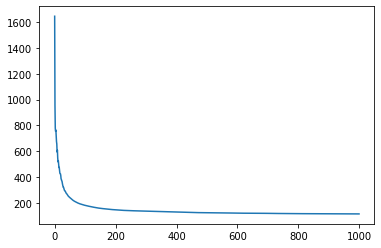

In [ ]:
plt.plot(error_train)